![](http://4.bp.blogspot.com/-vKTlnfnQDVk/VfDW2jkqoyI/AAAAAAABU_o/BvQZMfZqAho/s1600/mnist.JPG)

# What is MNIST Dataset?

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems.The MNIST dataset was constructed from two datasets of the US National Institute of Standards and Technology. The data is taken from 250 different people which include 50% students and 50% employee from Census Bureau. The purpose of the database is to use it for training and testing in the field of machine learning. 

MNIST is like the "Hello World" of machine learning. Its a database of handwritten digits (0-9), with which you can try out a few machine learning algorithms. The MNIST database contains 60,000 training images and 10,000 testing images.It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

The purpose of this notebook is to read the MNIST dataset efficiently into memory in Python.


### Imports
These are the imports required to run the notebook. 
- NumPy is the fundamental package for scientific computing with Python. It contains among other things:

    - a powerful N-dimensional array object
    - sophisticated (broadcasting) functions
    - tools for integrating C/C++ and Fortran code
    - useful linear algebra, Fourier transform, and random number capabilities 
- The OS module in Python provides a way of using operating system dependent functionality. 
- The urllib.request module defines functions and classes which help in opening URLs (mostly HTTP) in a complex world — basic and digest authentication, redirections, cookies and more.
- This module provides a simple interface to compress and decompress files just like the GNU programs gzip and gunzip would.
- matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. 
- The shutil module offers a number of high-level operations on files and collections of files. In particular, functions are provided which support file copying and removal. For operations on individual files.
- from skimage.io import imsave for saving the array as png files

In [1]:
import numpy as np
import os
import urllib.request
import gzip
import matplotlib.pyplot as plt
import shutil
from skimage.io import imsave

This is for the table to be alligned to the left rather then the middle

In [2]:
%%html
<style>
table {margin-left: 0 !important;}
</style>

### Download the dataset to a folder

In [3]:
# First make a folder which will store the the downloads
path = 'data/'

# If the file does not exist then make a new file 
# This makes sure that a file is made even when it doesnt exist
if not os.path.exists(path):
    os.makedirs(path)
else:
    print("Folder exists")

Folder exists


### Get the file url from [Data Set website](http://yann.lecun.com/exdb/mnist/) 
- First i will use the url "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz" to download the files. 
- This has all the train images and test images plus the labels for both sets from the database.

### The split method 
"Method returns a list of strings after breaking the given string by the specified separator"
- I'm using the split method to get the last value which is the name of the file
- Filename = url.split('/')[5] # i could do it this way or go to the last value like url.split('/')[-1]
- By splitting the url I get the last value of the url http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz which is train-images-idx3-ubyte.gz and thats what I will name my file when i download it.

### Download 
- Check if the file I am downloading already exists.
- If it does then dont download the file 
- Else if it doesn't exists then download the file from url to a folder called data.

##### Display all the files in the folder
os.listdir('data')This gets all the files in the Directory

In [4]:
# This will store all the rest of urls that i need to download
# The Train labels/Test Images /Test Labels
urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

# We can go through a for loop and download the files
for url in urls:
    # We can then split each url to just the file name 
    file = url.split('/')[-1]
    # print(file)
    
    #Now in the for loop check if the file exists 
    #if the file that im downloading already exists
    # Then it will not download it 
    if os.path.exists(path+file):
        print('The File Youre trying to download already exists!', file)
    else:
         #if the file does not exist the it will download the file
        print('The',file, 'Is Downloading')
        urllib.request.urlretrieve (url, path+file)
        
# This here shows how many files exist in the directory
# It should have 4 different files in the folder 
print()
print('These are the files in the Directory')
#lists the directory
os.listdir('data')

The File Youre trying to download already exists! train-images-idx3-ubyte.gz
The File Youre trying to download already exists! train-labels-idx1-ubyte.gz
The File Youre trying to download already exists! t10k-images-idx3-ubyte.gz
The File Youre trying to download already exists! t10k-labels-idx1-ubyte.gz

These are the files in the Directory


['t10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz']

### Read the contents of the file 

##### TRAINING SET IMAGE FILE (train-images-idx3-ubyte)
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

|Offset | Type               | Value           |   Description                   |
|:------|:-------------------|:----------------|:--------------------------------|
|0000   |32 bit integer      |0x00000801(2051) |magic number                     |
|0004   |32 bit integer      |10000 or 60000   |number of images                 |
|0008   |32 bit integer      |28               |number of rows                   |
|0012   |32 bit integer      |28               |number of columns                |
|0016   |unsigned byte       |??               |pixel                            |
|0017   |unsigned byte       |??               |pixel                            |
|...    |...                 |...              |...                              |
|xxxx   |unsigned byte       |??               |pixel                            |

### Read the contents of the MNIST dataset 

In [5]:
# open the file and read the contents of the file to a variable called fileC
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    fileC = f.read()

### Magic number
- The first 4 bits means its a magic number 
- The magic number is an integer (MSB first). The first 2 bytes are always 0. 
- The third byte codes the type of the data: 
- The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices

In [6]:
fileC[0:4] # magic number

b'\x00\x00\x08\x03'

In [7]:
#The actual value in int
int.from_bytes(fileC[0:4], byteorder='big')

2051

#### Number of images 
- The next 4 bytes are the number of images in the dataset.
- its in the binary form so the actual number is 00\00\10 if you read it the opposite 

In [8]:
print(fileC[4:8]) # This here is the size of the images 
int.from_bytes(fileC[4:8], byteorder='big')

b"\x00\x00'\x10"


10000

### Number of rows 
- Each Image has 28 rows and 28 columns 
- 28 * 28 = 784

In [9]:
print(fileC[8:12])# This is the number of rows
int.from_bytes(fileC[8:12], byteorder='big') # There are 28 rows 

b'\x00\x00\x00\x1c'


28

### Number of Columns

In [10]:
print(fileC[12:16])# This is the number of columns
int.from_bytes(fileC[12:16], byteorder='big') # There are 28 columns 

b'\x00\x00\x00\x1c'


28

### Plot the first image 
28 * 28 is equal = 784 which is equal to one image so every 784 pixels is a image 

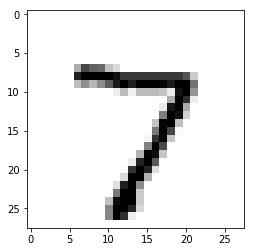

In [11]:
image = ~np.array(list(fileC[16:800])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

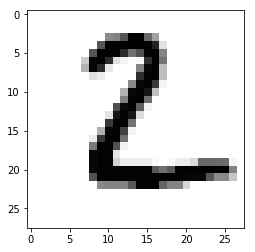

In [12]:
# 28 * 28 is equal = 784 which is equal to one image 
# so every 784 pixels is a image 
image = ~np.array(list(fileC[800:1584])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

## Save The file as images 
I am going to try to extract files from the MNIST dataset and save them as images.

### Extract the .gz Files
The files are in a format so we need to extract it. I have already downloaded the files but now I am going to extract it to the same folder.
- The folder should have 4 file which i previously downloaded 

The for loop goes through each of the 4 files and extracts them.
- Inside the for loop First checkif the file ends in the .gz format.
- If the file is in the right format then open the file zip.open(path+file, 'rb') 
- removes the .gz file using the split func remove the last value .gz 
- Use shtil to copy the contents from the files

In [13]:
files = os.listdir(path)

#the for loop goes through each file and extracts it 
for file in files:
    #checks if the file ends in .gz 
    if file.endswith('.gz'):
        #this reads the file with gzip 
        with gzip.open(path+file, 'rb') as In:
           #removes the .gz file
            with open(path+file.split('.')[0], 'wb') as out:
                #shutil copies the contents from In to out
                shutil.copyfileobj(In, out)
print('Done')

Done


### Delete the .gz Files
I have extracted the dataset and i dont need the .gz files anymore so I am going to delete it.

In [15]:
for file in files:
    if file.endswith('.gz'):
        os.remove(path+file)   
    else:
        print('All files have been Removed')
              
print ('Removed all the .GZ files')

Removed all the .GZ files


### Convert the ubyte files to numpy array
I will convert the ubyte into 4 n dimensional arrays.

| Key           |  Type        |Shape         |
|---------------|--------------|--------------|
| train_images  |numpy ndarray |[60000,28,28] |
| test_images   |numpy ndarray |[10000,28,28] |
| train_labels  |numpy ndarray |[60000]       |
| test_labels   |numpy ndarray |[10000]       |

- First check inside the for loop if the files end with ubyte (These are the files that i extracted earlier)
- If the file does match then proceed with opening the file:
    - read the file and get the magic number which is 4 bytes
    - Also read the size of the images 
    
- Then check if the file image size is 10,000 or 60,000: 
    - if its 10,000 then its a test image/label file
    - if its 60,000 then its Train image/label.
  
- Check if the magic number is 2051 or 2049:
    - If the magic number is 2051 then we know the file is a either train images or test images
        - Get the rows and cols from the dataset 
        - read values as ints and start from 16 as pixels being from byte 16
        - Then the int array to reshape(size,rows,cols)
    - If the magic number is 2049 then we know the file is eithe train or test labels.
        - read values as ints 
        - reshape int array to reshape(size)
        
- Lastly add all the values to the array:
    - ndArray[trainOrTest+'_'+imgOrLAbel] = parsed
    - The files go one by one and its goes through the if statements and the adds it to the array 


In [17]:
# Variables
files = os.listdir(path)
ndArray = {}

#go through a loop and add the files to the ndarray
for file in files:
    #if the extracted file matches then proceed
    if file.endswith('ubyte'):
        #print('Reading the file', file)
        #open the file if the it ends with ubyte and read 
        with open (path+file,'rb') as f:
            #read the file 
            data = f.read() 
            # find out the magic number of the file
            magic = int.from_bytes(data[0:4], byteorder='big')
            # find out the size of the images 
            size = int.from_bytes(data[4:8], byteorder='big')
            
            # this is the size of Test images and labels 
            if (size==10000):
                #here we will know if the file is a test image/label 
                trainOrTest = 'test'
            # this is the size for training labels and images 
            elif (size == 60000):
                #here we will know if the file is a Training image/label 
                trainOrTest = 'train'
            # This checks the magic number 2051 which is for image files 
            if (magic == 2051):
                imgOrLAbel = 'images'
                #This gets the nummber of rows 
                rows = int.from_bytes(data[8:12], byteorder='big')
                #this gets the number of columns 
                cols = int.from_bytes(data[12:16], byteorder='big')
                # read values as ints # start from 16 as pixels being from byte 16
                parsed = np.frombuffer(data,dtype = np.uint8, offset = 16) 
                # we will reshape the length, 28 x 28 
                parsed = parsed.reshape(size,rows,cols)  
            # this checks the magic number 2049 which is for labels 
            elif (magic == 2049):
                imgOrLAbel = 'labels'
                # read values as ints
                parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
                #reshape 
                parsed = parsed.reshape(size)
            #save each file as a array with their key 
            ndArray[trainOrTest+'_'+imgOrLAbel] = parsed
    else:
        print('No File Found')
print('Done')

Done


### Check the structure of the array

In [18]:
#check if the arrays are created for each file 
ndArray.keys()

dict_keys(['test_images', 'test_labels', 'train_images', 'train_labels'])

In [19]:
# this shows the shap of the test images 
# It has 10000 images and rows = 28 and cols = 28
ndArray['test_images'].shape

(10000, 28, 28)

### Print the first image in the array

In [9]:
# This prints out the first test_images 
ndArray['test_images'][0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Plot the first image in the array

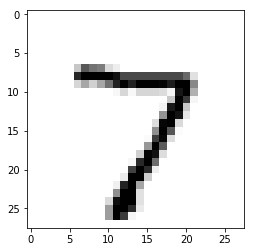

In [20]:
# This prints out the first image 
image = ndArray['test_images'][0,:,:]
plt.imshow(image, cmap='Greys')

The image number is:  0


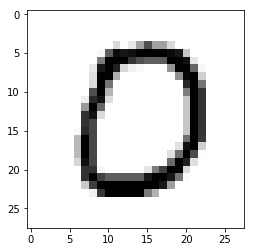

In [21]:
# This prints out the 11th image from the array
image = ndArray['test_images'][10,:,:]
plt.imshow(image, cmap='Greys')
# we can print the label to see if it matches with the test image [10]
print('The image number is: ', ndArray['test_labels'][10]) # it has the same label as the image 

### Downloading Images from the Array we created 
Make a for loop that saves the images for Test and Train consecutively.
- inside the for loop make two variables and intialise the Train_images and Train_label from the Array.
- for the images variable get the first value images.shape[0] which is the size of the images
- Then go through another for loop "for index in range (noOfImages)" which runs for the size of the images
- inside the second for loop get the index of image and label
- check if the folder exits for the label at that index if doesn't then create a folder
- Then get the size of the label folder 
- Lastly save the image with the length of the folder + 1

In [22]:
#To download all the pngs it takes about 10 Minutes 
# make a array 
traOrTests = ['train','test']

for traOrTest in traOrTests:  
    #this adds both train_images & test_images 
    images = ndArray[traOrTest+'_images']  
    #this adds both train_labels & test_labels 
    labels = ndArray[traOrTest+'_labels']   
    noOfImages = images.shape[0]# zero gets the first value of the array which is the size of the images
   
    #the for loop goes through both of the samples 60000 and 10000 
    for index in range (noOfImages):
        #here the traOrTest = train or test and the index is from 0 to 60000 and 0 to 10000
        
        if (index % 2000 == 0):
            print(traOrTest, index) 
            
        #image gets the current index images[1] as the array 
        image = images[index]
        # label is = to the current index 
        label = labels[index] 
        
        # If a folder does not exist then make one
        # path2 = 'data/data'
        # 'data/data/train/0/' basically here it checks if lets say 'data/data/train/2' exists
        # if it doesnt then it makes a new folder 
        if not os.path.exists(path+traOrTest+'/'+str(label)+'/'):  
            #make the directorys 
            os.makedirs(path+traOrTest+'/'+str(label)+'/')   
        # Here lets say the next image is of number 4 
        # here we'll get the length of the 'data/data/train/4'
        filenumber = len(os.listdir(path+traOrTest+'/'+str(label)+'/'))
        #And the then we will save the image with the length of the folder + 1
        imsave(path+traOrTest+'/'+str(label)+'/%05d.png'%(filenumber+1),image)
        
print('Done')
    

train 0
train 2000
train 4000
train 6000
train 8000
train 10000
train 12000
train 14000
train 16000
train 18000
train 20000
train 22000
train 24000
train 26000
train 28000
train 30000
train 32000
train 34000
train 36000
train 38000
train 40000
train 42000
train 44000
train 46000
train 48000
train 50000
train 52000
train 54000
train 56000
train 58000
test 0
test 2000
test 4000
test 6000
test 8000
Done


### Links
[What is MNIST?](https://en.wikipedia.org/wiki/MNIST_database)<br/>
[How to make a directory?](https://thispointer.com/how-to-create-a-directory-in-python/) <br/>
[Split()](https://www.geeksforgeeks.org/python-string-split/)<br/>
[Dowload http file in Python](https://stackoverflow.com/questions/19602931/basic-http-file-downloading-and-saving-to-disk-in-python)<br/>
[Download Files with Python](https://stackabuse.com/download-files-with-python/)<br/>
[How do I list all files of a directory?](https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory)<br/>
[ipython notebook align table to the left of cell](https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell)<br/>
[How to Delete a file?](https://www.cyberciti.biz/faq/python-delete-remove-file-if-exists-on-disk/)<br/>
[matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)<br/>
[Numpy](http://www.numpy.org/)